In [1]:
from hashlib import md5
import httpx
import random

APPID = '20211211001024950'
APPKEY = 'RJgY2Kk5HeBIoAZCXARw'
URL = 'http://api.fanyi.baidu.com/api/trans/vip/translate'
HEADERS = {'Content-Type': 'application/x-www-form-urlencoded'}


def make_md5(s: str, encoding='utf-8'):
    return md5(s.encode(encoding)).hexdigest()


async def translate(query: str, lang: str):
    salt = random.randint(32768, 65536)
    sign = make_md5(APPID + query + str(salt) + APPKEY)
    payload = {'appid': APPID, 'q': query, 'from': 'auto',
               'to': lang, 'salt': salt, 'sign': sign}
    async with httpx.AsyncClient() as c:
        result = await c.post(URL, params=payload, headers=HEADERS)

    return result.json()



<coroutine object translate at 0x10a4ecd40>

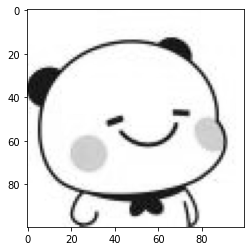

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
import base64
import io

url = 'https://q2.qlogo.cn/headimg_dl?dst_uin=1366723936&spec=100'

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'Host': 'q1.qlogo.cn',
    'Cache-Control': 'no-cache',
    'Pragma': 'no-cache',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36',
    # 'Upgrade-Insecure-Requests': '1',
    # 'Accept-Encoding': 'gzip, deflate',
    # 'Accept-Language': 'en,zh-CN;q=0.9,zh;q=0.8'
}

sess = requests.Session()

r = sess.get(url, headers=headers)

if r.status_code != 200:
    print(r.status_code)
    print(r.text)
else:
    # print(r)
    im = Image.open(io.BytesIO(r.content)).convert('L')

    plt.imshow(im, cmap='gray')
    # base64.b64encode(r).decode()

In [35]:
import io

buf = io.BytesIO(b'hhh')
print(buf.getvalue())
buf.flush()
buf.seek(0)
print(buf.getvalue())

b'hhh'
b'hhh'


In [40]:
from typing import Tuple
import re

s = '.en fuck u'

def get_lang_and_text(s: str) -> Tuple[str, str]:
    if not s.startswith('.'):
        return s

    i = s.find(' ')
    return s[1:i], s[i+1:]


re.match(r'[\u4e00-\u9fa5]', '英语')

<re.Match object; span=(0, 1), match='英'>

In [44]:
import datetime

datetime.date.today().strftime('%Y 年 %m 月%d 日')

'2021年12月13日'

In [52]:
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36',
}
r = requests.get('https://baike.baidu.com/cms/home/eventsOnHistory/12.json', headers=headers)

r.json()['12']['1212']

[{'year': '1642',
  'title': '荷兰航海家<a target="_blank" href="https://baike.baidu.com/item/%E4%BA%9A%E4%BC%AF%C2%B7%E5%A1%94%E6%96%AF%E6%9B%BC">亚伯·塔斯曼</a>发现<a target="_blank" href="https://baike.baidu.com/item/%E6%96%B0%E8%A5%BF%E5%85%B0">新西兰</a>',
  'festival': '',
  'link': 'https://baike.baidu.com/item/%E4%BA%9A%E4%BC%AF%C2%B7%E5%A1%94%E6%96%AF%E6%9B%BC',
  'type': 'event',
  'desc': '亚伯·塔斯曼，Abel Tasman，1603年～1659年10月10日，荷兰探险家、航海家、商人。                目录  1<a target="_blank" href="https://baike.baidu.com/item/">人物简介</a>    2<a target="_blank" href="https://baike.baidu.com/item/">第一次',
  'cover': False,
  'recommend': True},
 {'year': '1765',
  'title': '中国清代画家<a target="_blank" href="https://baike.baidu.com/item/%E9%83%91%E6%9D%BF%E6%A1%A5/27449">郑板桥</a>逝世',
  'festival': '',
  'link': 'https://baike.baidu.com/item/%E9%83%91%E6%9D%BF%E6%A1%A5/27449',
  'type': 'death',
  'desc': '郑燮（1693—1765年），字克柔，号板桥。自称板桥居士，<a target="_blank" href="https://baike.baidu.com/item/%E6%B8%85%E4%BB%A3">清代</